Optimal Buy Threshold: 0.9900000000000002
Optimal Sell Threshold: 1.06
Max Return: 2.1173565241731893


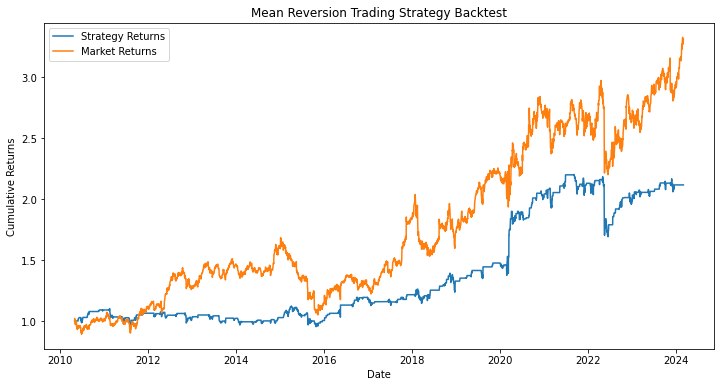

Strategy Final Return: 2.1173565241731893
Market Final Return: 3.310383148106326
Strategy Annual Return: 0.05577569111856273
Market Annual Return: 0.09047052469081729


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Walmart stock data
df = pd.read_csv('WMT.csv')

# Set date as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Compute simple moving average
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# Create SMA column
df['SMA'] = SMA(df, 21)

# Compute ratios
df['Ratios'] = df['Close'] / df['SMA']

# Initialize variables to store optimal thresholds
optimal_buy_threshold = 0
optimal_sell_threshold = 0
max_return = -np.inf

# Iterate over a range of possible thresholds
for buy_threshold in np.arange(0.8, 1.0, 0.01):
    for sell_threshold in np.arange(1.0, 1.2, 0.01):
        # Implement trading strategy
        positions = []
        for ratio in df['Ratios']:
            if ratio >= sell_threshold:  # If ratio is above sell threshold, sell
                positions.append(-1)
            elif ratio <= buy_threshold:  # If ratio is below buy threshold, buy
                positions.append(1)
            else:
                positions.append(0)  # Hold
        
        # Simulate trades and compute performance metrics
        backtest_results = simulate_trades(df, positions)
        strategy_final_return = backtest_results['Cumulative_Strategy_Returns'].iloc[-1]
        
        # Update optimal thresholds if the return is higher
        if strategy_final_return > max_return:
            optimal_buy_threshold = buy_threshold
            optimal_sell_threshold = sell_threshold
            max_return = strategy_final_return

# Print optimal thresholds
print(f"Optimal Buy Threshold: {optimal_buy_threshold}")
print(f"Optimal Sell Threshold: {optimal_sell_threshold}")
print(f"Max Return: {max_return}")

# Implement trading strategy with optimal thresholds
positions = []
for ratio in df['Ratios']:
    if ratio >= optimal_sell_threshold:  # If ratio is above sell threshold, sell
        positions.append(-1)
    elif ratio <= optimal_buy_threshold:  # If ratio is below buy threshold, buy
        positions.append(1)
    else:
        positions.append(0)  # Hold

# Simulate trades and compute performance metrics
backtest_results = simulate_trades(df, positions)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.plot(backtest_results['Cumulative_Market_Returns'], label='Market Returns')
plt.title('Mean Reversion Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Calculate and print performance metrics
strategy_final_return = backtest_results['Cumulative_Strategy_Returns'].iloc[-1]
market_final_return = backtest_results['Cumulative_Market_Returns'].iloc[-1]
strategy_annual_return = (strategy_final_return ** (252 / len(backtest_results))) - 1
market_annual_return = (market_final_return ** (252 / len(backtest_results))) - 1
print(f"Strategy Final Return: {strategy_final_return}")
print(f"Market Final Return: {market_final_return}")
print(f"Strategy Annual Return: {strategy_annual_return}")
print(f"Market Annual Return: {market_annual_return}")


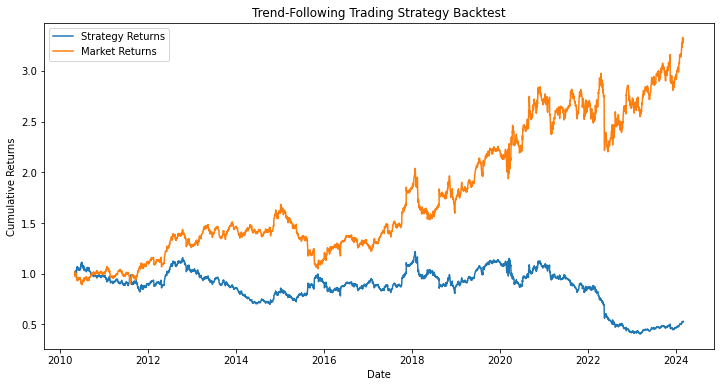

Strategy Final Return: 0.5278250953714446
Market Final Return: 3.310383148106326
Strategy Annual Return: -0.04517944528231155
Market Annual Return: 0.09047052469081729


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Walmart stock data
df = pd.read_csv('WMT.csv')

# Set date as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Compute short-term (fast) and long-term (slow) moving averages
def moving_average(data, window):
    return data.rolling(window=window).mean()

short_window = 50  # Short-term moving average window
long_window = 200   # Long-term moving average window

df['Short_MA'] = moving_average(df['Close'], short_window)
df['Long_MA'] = moving_average(df['Close'], long_window)

# Implement trend-following trading strategy
def trend_following_strategy(data):
    positions = []
    for i in range(len(data)):
        if data['Short_MA'].iloc[i] > data['Long_MA'].iloc[i]:
            positions.append(1)  # Buy signal
        else:
            positions.append(-1)  # Sell signal
    return positions

# Simulate trades and compute performance metrics
def simulate_trades(data, positions):
    data['Position'] = positions
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = data['Position'].shift(1) * data['Market_Returns']
    data['Cumulative_Strategy_Returns'] = (data['Strategy_Returns'] + 1).cumprod()
    data['Cumulative_Market_Returns'] = (data['Market_Returns'] + 1).cumprod()
    return data

# Run backtest
positions = trend_following_strategy(df)
backtest_results = simulate_trades(df, positions)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.plot(backtest_results['Cumulative_Market_Returns'], label='Market Returns')
plt.title('Trend-Following Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Calculate and print performance metrics
strategy_final_return = backtest_results['Cumulative_Strategy_Returns'].iloc[-1]
market_final_return = backtest_results['Cumulative_Market_Returns'].iloc[-1]
strategy_annual_return = (strategy_final_return ** (252 / len(backtest_results))) - 1
market_annual_return = (market_final_return ** (252 / len(backtest_results))) - 1
print(f"Strategy Final Return: {strategy_final_return}")
print(f"Market Final Return: {market_final_return}")
print(f"Strategy Annual Return: {strategy_annual_return}")
print(f"Market Annual Return: {market_annual_return}")


/home/hidri/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hidri/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hidri/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/hidri/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

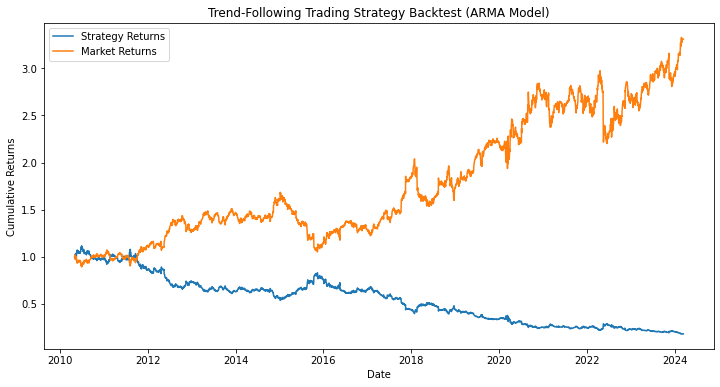

Strategy Final Return: 0.17937414778908223
Market Final Return: 3.310383148106326
Strategy Annual Return: -0.11661988685742908
Market Annual Return: 0.09022713725867137


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Read Walmart stock data
df = pd.read_csv('WMT.csv')

# Set date as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Compute returns
df['Returns'] = df['Close'].pct_change()

# Fit ARIMA model (ARMA in this case)
order = (5, 0, 2)  # (p, d, q) order of the ARIMA model
model = ARIMA(df['Close'], order=order)
model_fit = model.fit()

# Forecast returns
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a new index for the forecasted returns
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, closed='right')[1:]

# Implement trend-following strategy based on forecasted returns
def trend_following_strategy(data):
    positions = []
    for i in range(len(data)):
        if data['Forecasted_Returns'].iloc[i] > 0:
            positions.append(1)  # Buy signal
        else:
            positions.append(-1)  # Sell signal
    return positions

# Simulate trades and compute performance metrics
def simulate_trades(data, positions):
    data['Position'] = positions
    data['Market_Returns'] = data['Close'].pct_change()
    data['Strategy_Returns'] = data['Position'].shift(1) * data['Market_Returns']
    data['Cumulative_Strategy_Returns'] = (data['Strategy_Returns'] + 1).cumprod()
    data['Cumulative_Market_Returns'] = (data['Market_Returns'] + 1).cumprod()
    return data

# Generate forecasted returns with the appropriate index
forecast_df = pd.DataFrame({'Forecasted_Returns': forecast}, index=forecast_index)

# Concatenate forecasted returns with the original DataFrame
df = pd.concat([df, forecast_df])

# Run backtest
positions = trend_following_strategy(df)
backtest_results = simulate_trades(df, positions)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(backtest_results['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.plot(backtest_results['Cumulative_Market_Returns'], label='Market Returns')
plt.title('Trend-Following Trading Strategy Backtest (ARMA Model)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Calculate and print performance metrics
strategy_final_return = backtest_results['Cumulative_Strategy_Returns'].iloc[-1]
market_final_return = backtest_results['Cumulative_Market_Returns'].iloc[-1]
strategy_annual_return = (strategy_final_return ** (252 / len(backtest_results))) - 1
market_annual_return = (market_final_return ** (252 / len(backtest_results))) - 1
print(f"Strategy Final Return: {strategy_final_return}")
print(f"Market Final Return: {market_final_return}")
print(f"Strategy Annual Return: {strategy_annual_return}")
print(f"Market Annual Return: {market_annual_return}")
